Usando o exemplo 499

In [45]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install nltk
%pip install lime

%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
#importando pacotes e bibliotecas para um SVM

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
#from sklearn.feature_extraction.text import CountVectorizer #converter os textos em uma matriz
from sklearn.feature_extraction.text import TfidfTransformer #frequencia que o termo aparece
from lime.lime_text import LimeTextExplainer

#from sklearn.svm import LinearSVC, SVC # dados lineares / não lineares
from imblearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [49]:
#importando dataset

df = pd.read_csv("../news_clean_onlly.csv")

In [50]:
df.head(5)

,Unnamed: 0,title,subject,date,Label,clean_text,label_number,char_count,word_count,avg_word_length
0,0,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",Fake,donald trump just couldn t wish all americans ...,0,2620,474,5.527426
1,1,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",Fake,house intelligence committee chairman devin nu...,0,1850,304,6.085526
2,2,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",Fake,on friday it was revealed that former milwauke...,0,3298,564,5.847518
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",Fake,on christmas day donald trump announced that h...,0,2462,423,5.820331
4,4,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",Fake,pope francis used his annual christmas day mes...,0,2292,420,5.457143


In [51]:
df.shape

(38516, 10)

<Axes: xlabel='Label', ylabel='count'>

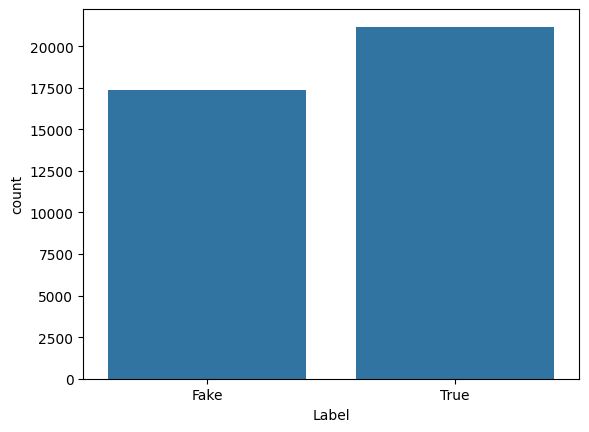

In [52]:
#exibindo os dados em um gráfico de barras
sns.countplot(x='Label', data=df)

**Pré-processamento**

In [53]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Baixar pacotes necessários do NLTK
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('punkt_tab') # Download the 'punkt_tab' resource

[nltk_data] Downloading package stopwords to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [54]:
def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()

    # Remover caracteres especiais e números
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Tokenização (dividir em palavras)
    tokens = word_tokenize(text)

    # Remover stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # Lematização (reduzir palavras à sua forma base)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Juntar as palavras processadas de volta em uma string
    return " ".join(tokens)

In [55]:
df["clean_text"] = df["title"].apply(preprocess_text)

In [56]:
df.head(5)

,Unnamed: 0,title,subject,date,Label,clean_text,label_number,char_count,word_count,avg_word_length
0,0,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",Fake,donald trump sends embarrassing new year eve m...,0,2620,474,5.527426
1,1,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",Fake,drunk bragging trump staffer started russian c...,0,1850,304,6.085526
2,2,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",Fake,sheriff david clarke becomes internet joke thr...,0,3298,564,5.847518
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",Fake,trump obsessed even obamas name coded website ...,0,2462,423,5.820331
4,4,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",Fake,pope francis called donald trump christmas speech,0,2292,420,5.457143


<Axes: xlabel='Label', ylabel='count'>

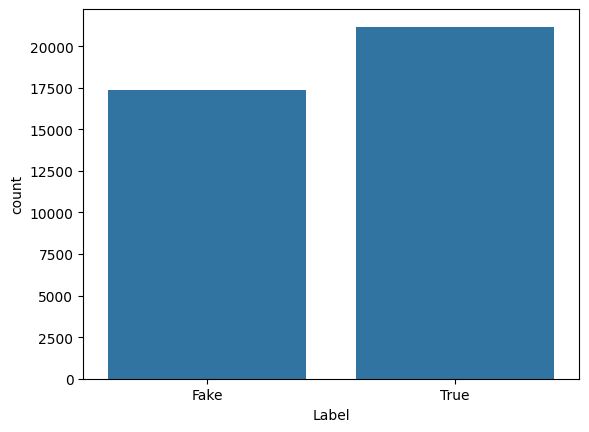

In [57]:
sns.countplot(x="Label", data=df) # validando se mudou as classes

**UNDERSAMPLING**

In [58]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Separar features e rótulos
X = df["clean_text"]
y = df["Label"]

# Dividir em treino e teste antes do balanceamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vetorização dos textos (CountVectorizer)
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)  # Apenas transform, sem fit

# Aplicar undersampling APENAS no conjunto de treino
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_vect, y_train)

<Axes: xlabel='Label', ylabel='count'>

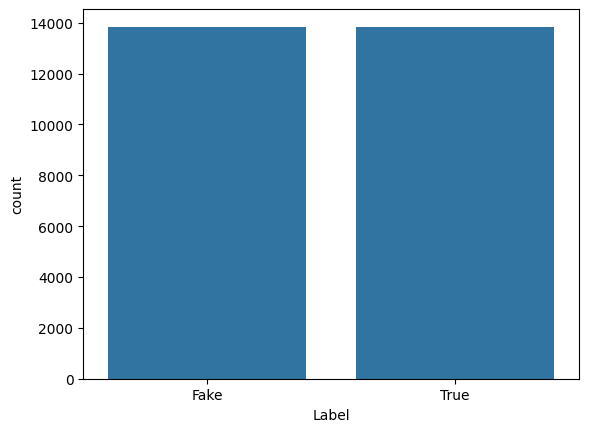

In [59]:
#verificar a nova distribuição de classes
sns.countplot(x=y_train_resampled)

TREINAMENTO

In [60]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from imblearn.under_sampling import RandomUnderSampler

# Pipeline completo (inclui vetorização)
#pipeline = Pipeline([
#    ('vect', CountVectorizer()),
#    ('tfidf', TfidfTransformer()),
#    ('clf', LinearSVC())
#])

Pipeline([
    ('vect', CountVectorizer()),
    ('under', RandomUnderSampler(random_state=42)),
    ('clf', LinearSVC())
])


# Balanceamento APENAS no treino
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train.to_frame(), y_train)
X_train_resampled = X_train_resampled.squeeze()  # volta para Series

# Treinamento do pipeline
pipeline.fit(X_train_resampled, y_train_resampled)

,steps,"[('vect', ...), ('tfidf', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [61]:
# Realiza a predição no conjunto de teste
y_pred = pipeline.predict(X_test)

**Métricas de Desempenho**

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Usando 'weighted' para classes múltiplas
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Acuraccy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Acuraccy: 0.9369
Precision: 0.9369
Recall: 0.9369
F1-Score: 0.9369


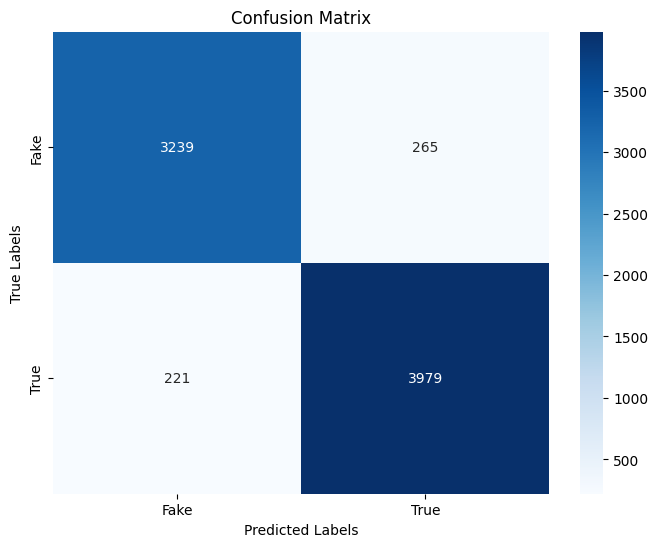

In [63]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


**LIME**

In [64]:
# Assuming 'text' is the column name containing the text data and 'sentiment' is the target column
X = df['clean_text']
y = df['Label']

In [65]:
from IPython.display import display
from lime.lime_text import LimeTextExplainer

# Criando o explainer
explainer = LimeTextExplainer(class_names=list(pipeline.classes_))

def predict_proba(texts):
    # LIME espera probabilidades, mas LinearSVC não tem predict_proba.
    # Usamos decision_function e normalizamos para somar 1 (softmax-like).
    scores = pipeline.decision_function(texts)
    import numpy as np
    # Se for 1D (binary), transforma em 2D
    if len(scores.shape) == 1:
        scores = np.vstack([-scores, scores]).T
    # Softmax para converter scores em "probabilidades"
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs = exp_scores / exp_scores.sum(axis=1, keepdims=True)
    return probs

# Solicita ao usuário o número da linha do exemplo
idx = int(input(f"Digite o número da linha (0 a {len(X_test)-1}): "))
sample_text = X_test.iloc[idx]
sample_label = y_test.iloc[idx]

# Predição da classe para o texto selecionado
pred_class_name = pipeline.predict([sample_text])[0]

print(f"Número da linha no X_test: {idx}")
print(f"Original text:\n{sample_text}")
print(f"Real class: {sample_label}")
print(f"Classe predita: {pred_class_name}")


explanation = explainer.explain_instance(
    sample_text,
    predict_proba,
    num_features=10
)

Número da linha no X_test: 499
Original text:
party motherland north korea kim herald missile test setback
Real class: True
Classe predita: True


In [66]:
import matplotlib.pyplot as plt

# Obtém as palavras mais importantes e seus pesos
lime_features = explanation.as_list()

# Exibe cada palavra com seu impacto na predição
print("Palavras mais importantes e seus pesos:")
for word, weight in lime_features:
    print(f"{word}: {weight:.4f}")


Palavras mais importantes e seus pesos:
north: 0.0714
korea: 0.0494
setback: 0.0421
party: 0.0115
herald: -0.0109
kim: -0.0085
missile: 0.0065
test: 0.0019
motherland: 0.0010


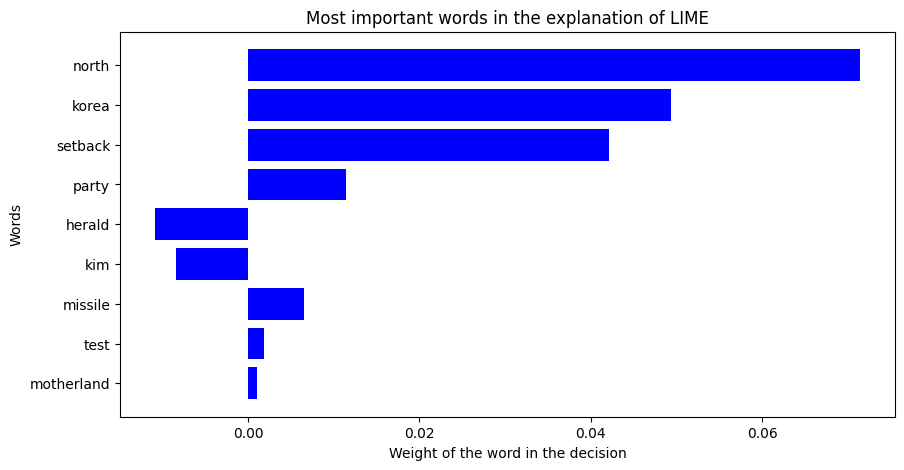

In [67]:
# Separar palavras e pesos
words, weights = zip(*lime_features)

# Criar gráfico de barras
plt.figure(figsize=(10, 5))
plt.barh(words, weights, color="blue")
plt.xlabel("Weight of the word in the decision")
plt.ylabel("Words")
plt.title("Most important words in the explanation of LIME")
plt.gca().invert_yaxis()  # Inverter para mostrar a palavra mais importante no topo
plt.show()

In [68]:
explanation_list = explanation.as_list()
lime_df = pd.DataFrame(explanation_list, columns=["Word", "Impact"])

# Ordenar por impacto
lime_df = lime_df.sort_values(by="Impact", ascending=False)

display(lime_df.head(20))  # Exibir as 20 palavras mais impactantes

,Word,Impact
0,north,0.071378
1,korea,0.049407
2,setback,0.042089
3,party,0.011479
6,missile,0.006512
7,test,0.001906
8,motherland,0.001001
5,kim,-0.008477
4,herald,-0.010856


<Figure size 1000x600 with 0 Axes>

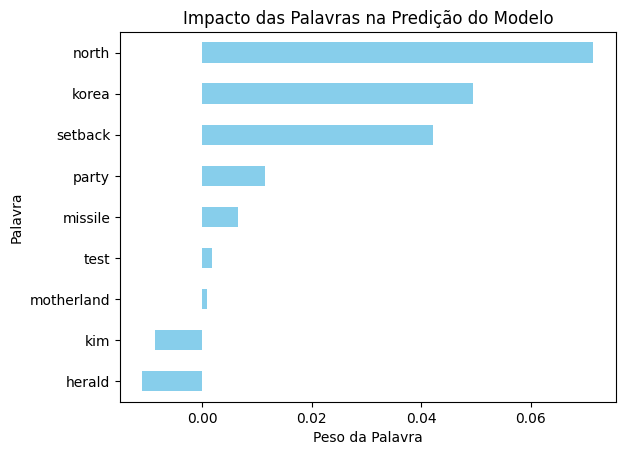

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
lime_df.plot(kind="barh", x="Word", y="Impact", color="skyblue", legend=False)
plt.xlabel("Peso da Palavra")
plt.ylabel("Palavra")
plt.title("Impacto das Palavras na Predição do Modelo")
plt.gca().invert_yaxis()  # Inverte o eixo para as palavras mais importantes ficarem no topo
plt.show()

**Attention Vizualization**

In [70]:
print(pipeline.classes_)

['Fake' 'True']


Palavras do exemplo e seus pesos na decisão da classe prevista:
       Feature    Weight
11585    north  1.308345
9547     korea  0.926747
15285  setback  0.647327
12348    party  0.321731
10900  missile  0.273023
17024     test  0.207363
8013    herald  0.176450
9472       kim  0.126753


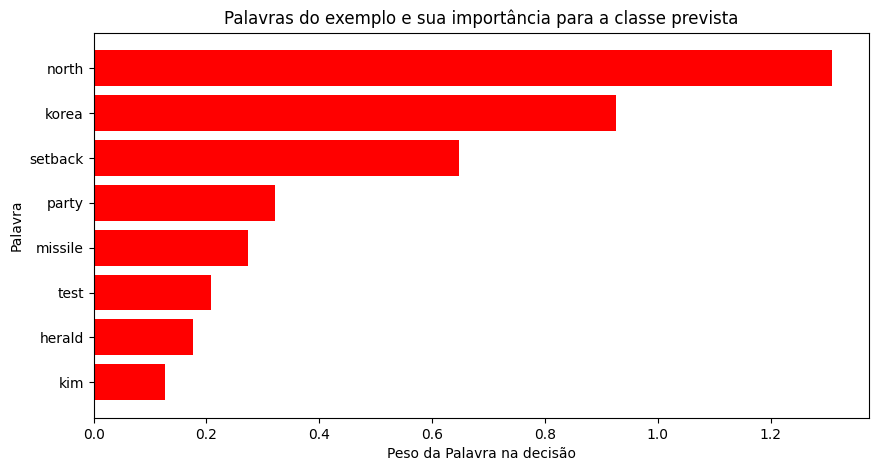

In [71]:
# Obter os nomes das features do CountVectorizer
feature_names = pipeline.named_steps['vect'].get_feature_names_out()

# Obter os coeficientes do SVM para a classe prevista
clf = pipeline.named_steps['clf']
vect = pipeline.named_steps['vect']

# Sempre existe apenas um vetor de pesos no caso binário
pesos = clf.coef_[0]

classe_prevista = pipeline.predict([sample_text])[0]
classes = pipeline.classes_

# Ajustar o sinal para explicar a classe prevista
if classe_prevista == classes[0]:
    pesos = -pesos

# Criar DataFrame com as features e pesos
importancias = pd.DataFrame({'Feature': feature_names, 'Weight': pesos})

# Marcar as palavras do exemplo
#palavras_exemplo = set(sample_text.split())
palavras_exemplo = set(vect.build_analyzer()(sample_text))
importancias['No_Exemplo'] = importancias['Feature'].apply(lambda x: x in palavras_exemplo)

# Visualizar as palavras do exemplo e seus pesos
importancias_exemplo = importancias[importancias['No_Exemplo']].sort_values(by='Weight', ascending=False)

print("Palavras do exemplo e seus pesos na decisão da classe prevista:")
print(importancias_exemplo[['Feature', 'Weight']])

# Plotar as palavras do exemplo
plt.figure(figsize=(10, 5))
plt.barh(importancias_exemplo['Feature'], importancias_exemplo['Weight'], color="red")
plt.xlabel("Peso da Palavra na decisão")
plt.ylabel("Palavra")
plt.title("Palavras do exemplo e sua importância para a classe prevista")
plt.gca().invert_yaxis()
plt.show()

In [72]:
# Vetorizar o texto
x_texto = vect.transform([sample_text]).toarray()[0]

# Contribuição local (x_i * w_i)
importancias = pd.DataFrame({
    'Feature': vect.get_feature_names_out(),
    'Weight': pesos,
    'Contribution': x_texto * pesos
})

# Apenas palavras presentes
importancias_exemplo = importancias[importancias['Contribution'] != 0] \
    .sort_values(by='Contribution', ascending=False)


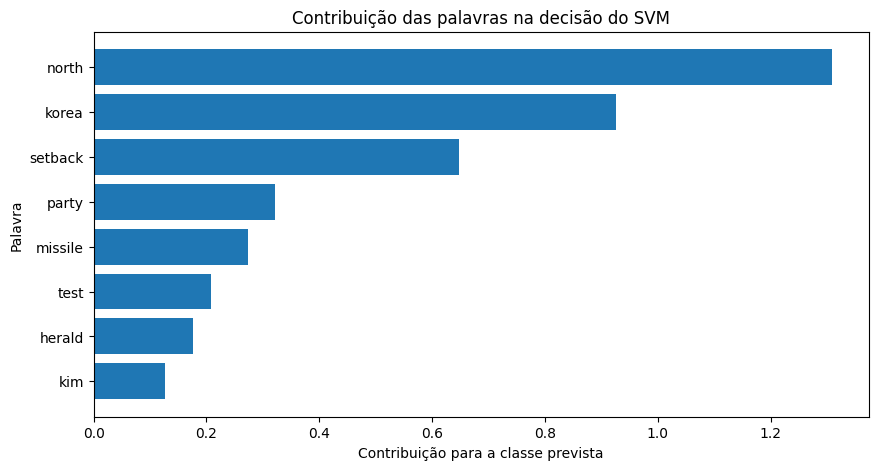

In [73]:
plt.figure(figsize=(10,5))
plt.barh(importancias_exemplo['Feature'], importancias_exemplo['Contribution'])
plt.xlabel("Contribuição para a classe prevista")
plt.ylabel("Palavra")
plt.title("Contribuição das palavras na decisão do SVM")
plt.gca().invert_yaxis()
plt.show()
